# WeatherPy
----

#### Observations:
    * As expected, the closer the latitudes are to the equator, the hotter the maximum temperatures (Fig 1).  By comparing the maximum temperatures of the Northern and Southern Hemispheres separately, the r-value calculated confirms this relationship (Fig 5 & 6).
    
    * When looking at humidity and cloudiness, the plots do not appear to show a relationship (Fig 2 & 3). The linear regression models which examine both the Northern and Southern Hemispheres confirm the weak correlation for both humidity and cloudiness, respectively (Fig 5-7).  Other factors could explain the small r-values, such as a city's proximity to bodies of water or even altitude.
    
    * The wind speeds are generally below 15mph across all the latitudes acquired for this sample (Fig 4).  When looking at the wind speeds between the Northern and Southern Hemispheres, there might be a correlation, however more analysis is required.

In [1]:
! pip install citipy

In [2]:
# Dependencies
import requests
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from citipy import citipy
from urllib.parse import quote
%matplotlib notebook 

# Import Keys
from config import weather_api_key



## Generate Cities List

In [3]:
# Create empty list for cities
cities =[]

# Create random lat and lon using numpy.random.uniform for uniform distribution
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Use zip function to combine lat and lng
gcoords = zip(lats, lngs)

#Create for loop to append to list
for gcoord in gcoords:
    city = citipy.nearest_city(gcoord[0], gcoord[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

593

In [4]:
#Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key = weather_api_key

query_url = f"{url}appid={api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_name = []
lat = []
lng = []

counter = 1

print(f"Beginning Data Retrieval")
print(f"-----------------------------")
      
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        print(f"Processing Record {counter} | {city}")
        
        counter = counter + 1
                   
        # To test a small sample to ensure code works
        #if counter == 5:
            #break
    except:
        print(f" City not found. Skipping...")
print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 | dikson
Processing Record 2 | hithadhoo
Processing Record 3 | moerai
Processing Record 4 | georgetown
Processing Record 5 | punta arenas
 City not found. Skipping...
Processing Record 6 | saint-philippe
Processing Record 7 | bilibino
Processing Record 8 | torbay
Processing Record 9 | torata
Processing Record 10 | chuy
Processing Record 11 | amga
Processing Record 12 | cairns
Processing Record 13 | arlit
 City not found. Skipping...
Processing Record 14 | vaini
Processing Record 15 | kapaa
Processing Record 16 | coos bay
Processing Record 17 | ushuaia
Processing Record 18 | longyearbyen
Processing Record 19 | yellowknife
Processing Record 20 | kodiak
Processing Record 21 | barrow
Processing Record 22 | vardo
Processing Record 23 | grindavik
Processing Record 24 | bonfim
Processing Record 25 | jamestown
Processing Record 26 | haines junction
Processing Record 27 | cape town
Processing Record 28 | port alfred
Proc

Processing Record 227 | shelburne
Processing Record 228 | dunedin
Processing Record 229 | effingham
Processing Record 230 | teya
Processing Record 231 | raudeberg
Processing Record 232 | ugoofaaru
Processing Record 233 | mackay
Processing Record 234 | bengkulu
Processing Record 235 | garissa
Processing Record 236 | deputatskiy
Processing Record 237 | rapid valley
Processing Record 238 | dosso
Processing Record 239 | shambu
Processing Record 240 | zlitan
Processing Record 241 | simbahan
Processing Record 242 | cabedelo
Processing Record 243 | nizhniy odes
Processing Record 244 | londrina
Processing Record 245 | bethel
Processing Record 246 | benemerito de las americas
Processing Record 247 | sao filipe
 City not found. Skipping...
Processing Record 248 | joao pinheiro
 City not found. Skipping...
Processing Record 249 | ariano irpino
Processing Record 250 | flin flon
Processing Record 251 | villazon
Processing Record 252 | nanortalik
 City not found. Skipping...
Processing Record 253 | 

Processing Record 457 | kirillov
Processing Record 458 | dudinka
Processing Record 459 | douentza
Processing Record 460 | colesberg
Processing Record 461 | shu
Processing Record 462 | petropavlovsk-kamchatskiy
Processing Record 463 | viedma
Processing Record 464 | mnogovershinnyy
Processing Record 465 | bundaberg
Processing Record 466 | damaturu
Processing Record 467 | berbera
Processing Record 468 | kabalo
Processing Record 469 | saldanha
Processing Record 470 | harper
Processing Record 471 | belmonte
 City not found. Skipping...
Processing Record 472 | barbastro
Processing Record 473 | kibala
Processing Record 474 | masterton
Processing Record 475 | jiuquan
Processing Record 476 | west bay
Processing Record 477 | ayagoz
Processing Record 478 | lukh
Processing Record 479 | makinsk
Processing Record 480 | lavrentiya
Processing Record 481 | bartica
Processing Record 482 | trelew
Processing Record 483 | mahibadhoo
Processing Record 484 | dicabisagan
 City not found. Skipping...
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a data frame, using dict function
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp (F)": max_temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness, 
    "Wind Speed (mph)": wind_speed,
    "Country": country,
    "Date": date}

df_weatherpy = pd.DataFrame(weather_dict)
df_weatherpy.count()

City                541
Lat                 541
Lng                 541
Max Temp (F)        541
Humidity (%)        541
Cloudiness (%)      541
Wind Speed (mph)    541
Country             541
Date                541
dtype: int64

In [7]:
df_weatherpy.to_csv("Weather_Data.csv")

In [8]:
df_weatherpy = pd.read_csv('Weather_Data.csv').drop('Unnamed: 0', axis=1)

df_weatherpy.head()

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Dikson,73.51,80.55,30.72,94,100,20.83,RU,1602798371
1,Hithadhoo,-0.60,73.08,82.31,75,97,20.09,MV,1602798372
2,Moerai,-22.43,-151.33,72.18,84,88,18.54,PF,1602798372
3,George Town,5.41,100.34,77.00,88,40,8.05,MY,1602798243
4,Punta Arenas,-53.15,-70.92,51.80,53,75,34.45,CL,1602798373


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
df_weatherpy["Humidity (%)"].sort_values()
# There are no cities in this dataframe that has humidity over 100%

410      1
195      8
262     10
384     10
12      11
      ... 
223    100
212    100
456    100
504    100
350    100
Name: Humidity (%), Length: 541, dtype: int64

In [10]:
df_weatherpy.describe()

,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02
mean,18.008059,14.568651,62.574270,71.014787,51.408503,8.847320,1.602798e+09
std,33.306493,89.963572,19.043257,21.482287,38.476273,5.787497,8.401407e+01
min,-54.800000,-175.200000,9.660000,1.000000,0.000000,0.400000,1.602798e+09
25%,-8.930000,-65.590000,48.990000,60.000000,7.000000,4.290000,1.602798e+09
50%,20.450000,17.690000,66.200000,76.000000,56.000000,8.050000,1.602798e+09
75%,45.840000,90.600000,78.310000,87.000000,90.000000,12.060000,1.602799e+09
max,78.220000,179.320000,96.010000,100.000000,100.000000,34.450000,1.602799e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


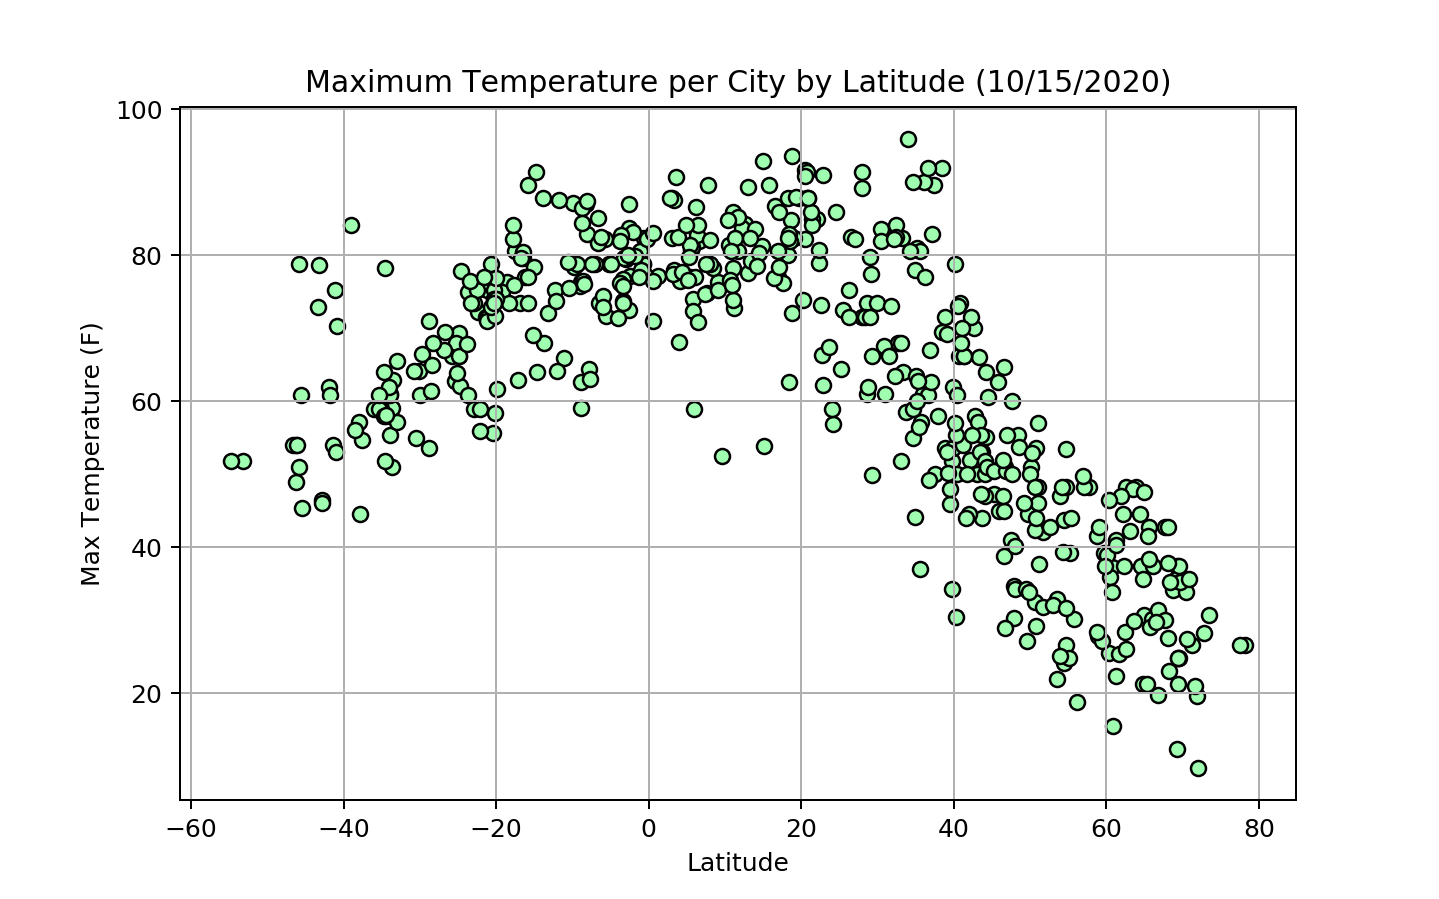

In [11]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(df_weatherpy['Lat'], df_weatherpy['Max Temp (F)'], 
           marker='o', facecolors='#9ffeb0', edgecolor='black')
ax.set(xlabel="Latitude", ylabel="Max Temperature (F)",
      title= "Maximum Temperature per City by Latitude (10/15/2020)")
ax.grid()
plt.savefig("Fig1.png");

##### Latitude vs. Temperature Plot (Fig 1 )
The maximum temperature for the cities located near the equator, or 0 latitude are experiencing the hottest temperatures.  The further the cities are away from the equator, the cooler the temperatures.

In [12]:
def scatplot(x_values, y_values, x_label, y_label):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.scatter(x_values, y_values, 
               marker='o', facecolors='#9ffeb0', edgecolor='black')
    ax.set(xlabel=x_label, ylabel=y_label,
          )
    ax.grid()

## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


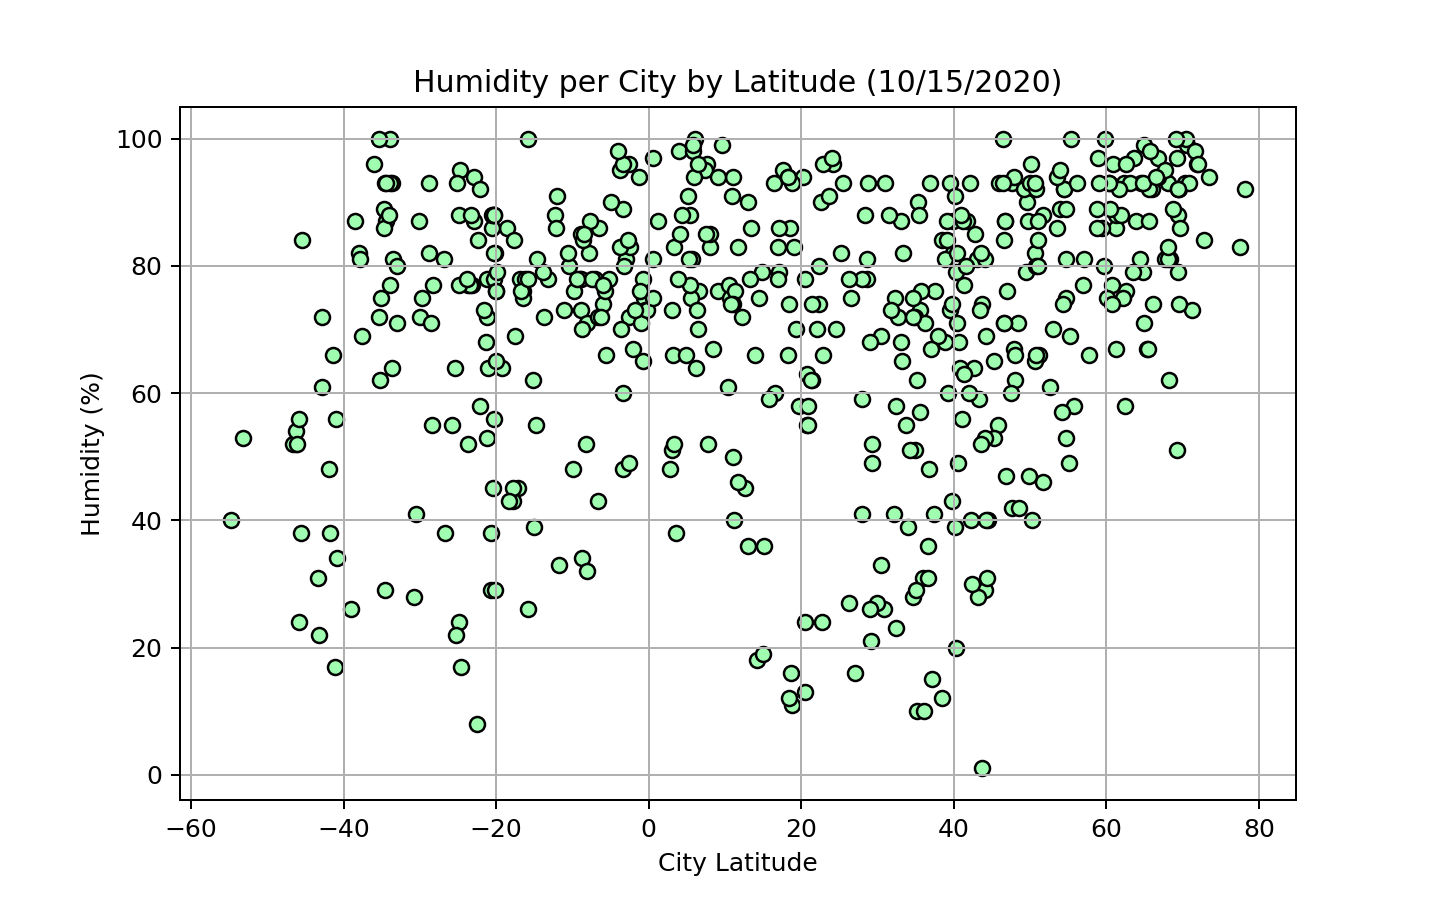

In [13]:
ax2 = scatplot(df_weatherpy['Lat'], df_weatherpy['Humidity (%)'], "City Latitude", "Humidity (%)")
plt.title("Humidity per City by Latitude (10/15/2020)")
plt.savefig("Fig2.png");

##### Latitude vs. Humidity Plot (Fig 2)
Despite many of the cities experiencing 60% to 100% humidity levels, there does not appear to be a relationship between latitude and humidity.  

## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


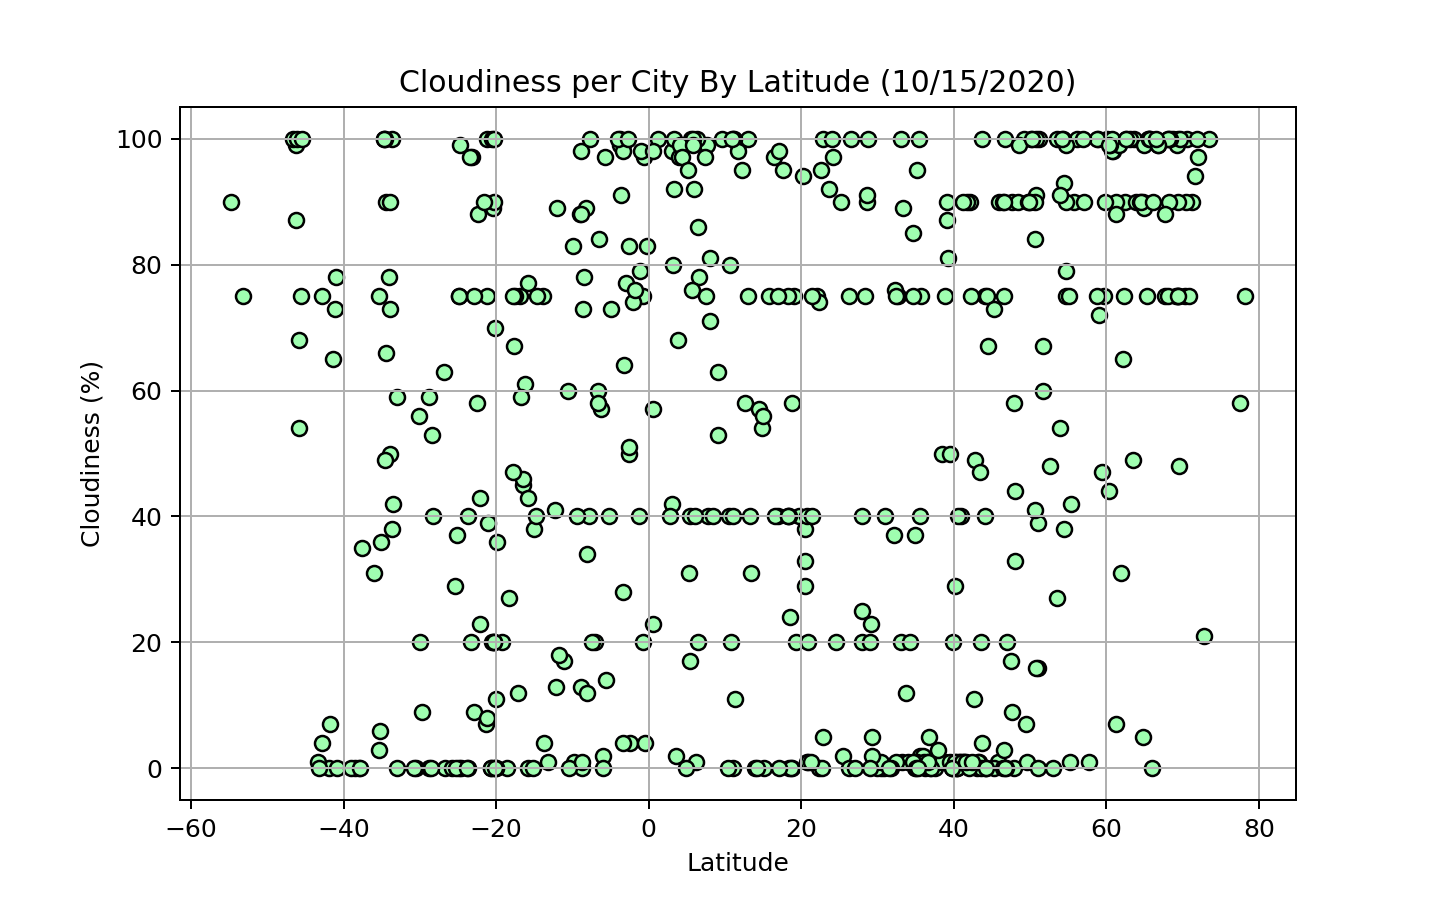

In [14]:
ax3 = scatplot(df_weatherpy['Lat'], df_weatherpy['Cloudiness (%)'], "Latitude", "Cloudiness (%)")
plt.title("Cloudiness per City By Latitude (10/15/2020)")
plt.savefig("Fig3.png");

##### Latitude vs. Cloudiness Plot (Fig 3)
By comparing a city's latitude to its cloud levels, there is not a relationship to be detected.  

## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


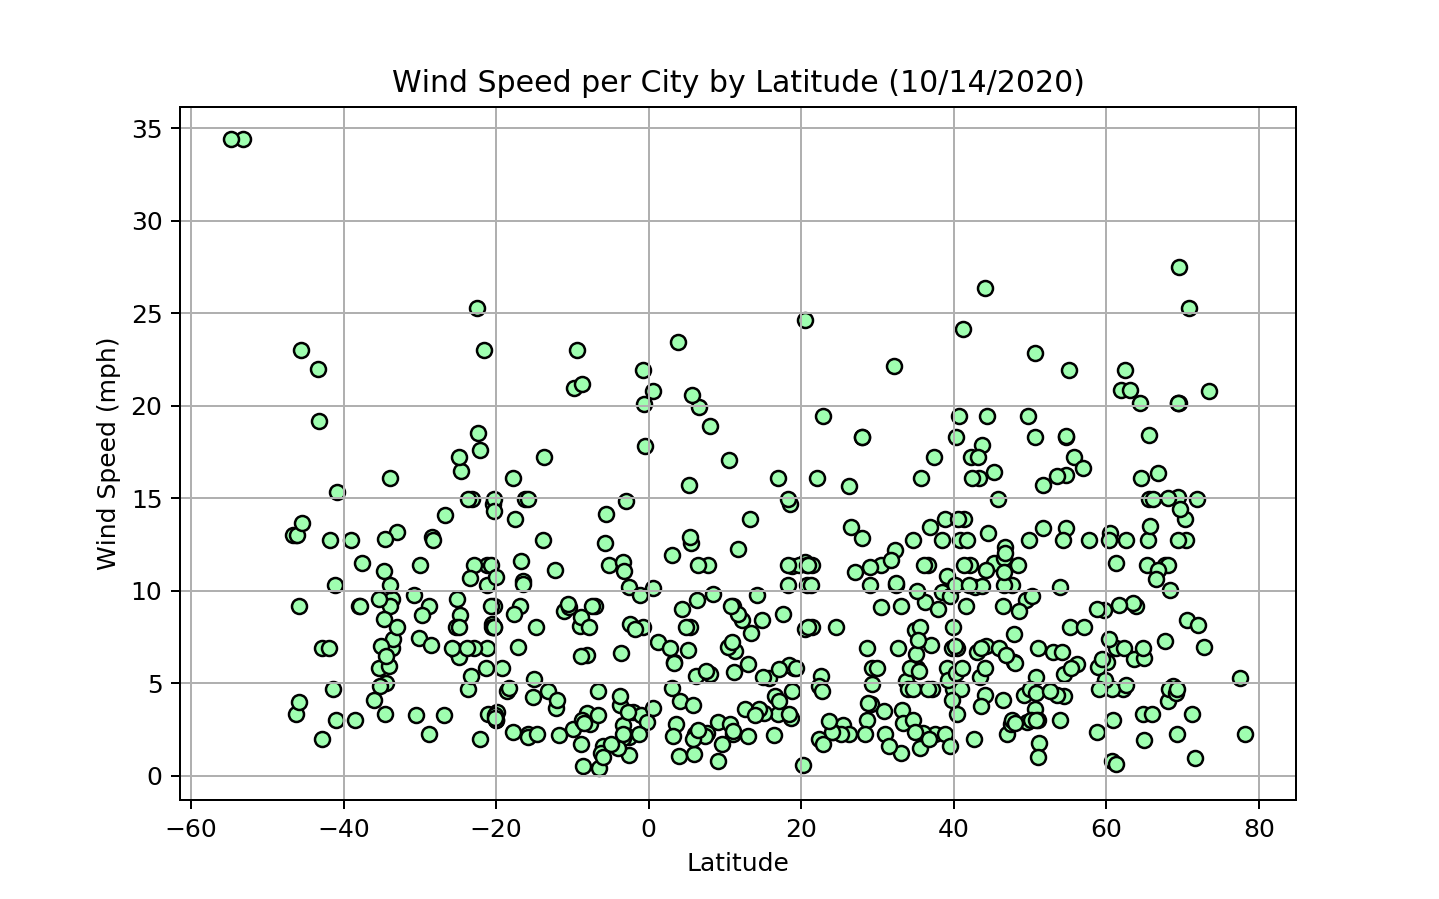

In [15]:
ax4 = scatplot(df_weatherpy['Lat'], df_weatherpy['Wind Speed (mph)'], "Latitude", "Wind Speed (mph)")
plt.title("Wind Speed per City by Latitude (10/14/2020)")
plt.savefig("Fig4.png");

##### Latitude vs. Wind Speed Plot (Fig 4)
Outside of some cities experiencing wind speeds of 15mph or more, the majority of the cities have wind speeds of less than 15mph.  However, this trend is spans for both the Northern and Southern Hemispheres.

## Linear Regression

In [16]:
# Create df for the two hemispheres

north = df_weatherpy.loc[df_weatherpy['Lat'] >= 0.0]
north.head()

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Dikson,73.51,80.55,30.72,94,100,20.83,RU,1602798371
3,George Town,5.41,100.34,77.00,88,40,8.05,MY,1602798243
6,Bilibino,68.05,166.44,27.55,93,100,4.05,RU,1602798374
7,Torbay,47.67,-52.73,60.01,93,90,10.29,CA,1602798374
10,Amga,60.90,131.96,15.42,96,98,3.04,RU,1602798375


In [17]:
south = df_weatherpy.loc[df_weatherpy['Lat'] < 0.0]
south.head()

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
1,Hithadhoo,-0.60,73.08,82.31,75,97,20.09,MV,1602798372
2,Moerai,-22.43,-151.33,72.18,84,88,18.54,PF,1602798372
4,Punta Arenas,-53.15,-70.92,51.80,53,75,34.45,CL,1602798373
5,Saint-Philippe,-21.36,55.77,71.60,68,7,5.82,RE,1602798374
8,Torata,-17.08,-70.84,62.91,45,12,6.96,PE,1602798374


In [18]:
from scipy import stats
def linregressplot(x_values, y_values, x_label, y_label, label_loc):
    
    fig, ax = plt.subplots(figsize=(8,5));
    ax.scatter(x_values, y_values, marker="o", color='b');
    ax.set(xlabel=x_label,
          ylabel=y_label);
    
    slope, intercept, rvalue, pvalue, _ = stats.linregress(x_values, y_values)
    y_predicted = [slope*x + intercept for x in x_values]
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    ax.plot(x_values, y_predicted, color='r')
    plt.annotate(line_eq, label_loc, fontsize=10,color="red")
    
    print(f"The rvalue is {rvalue}.");

##  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


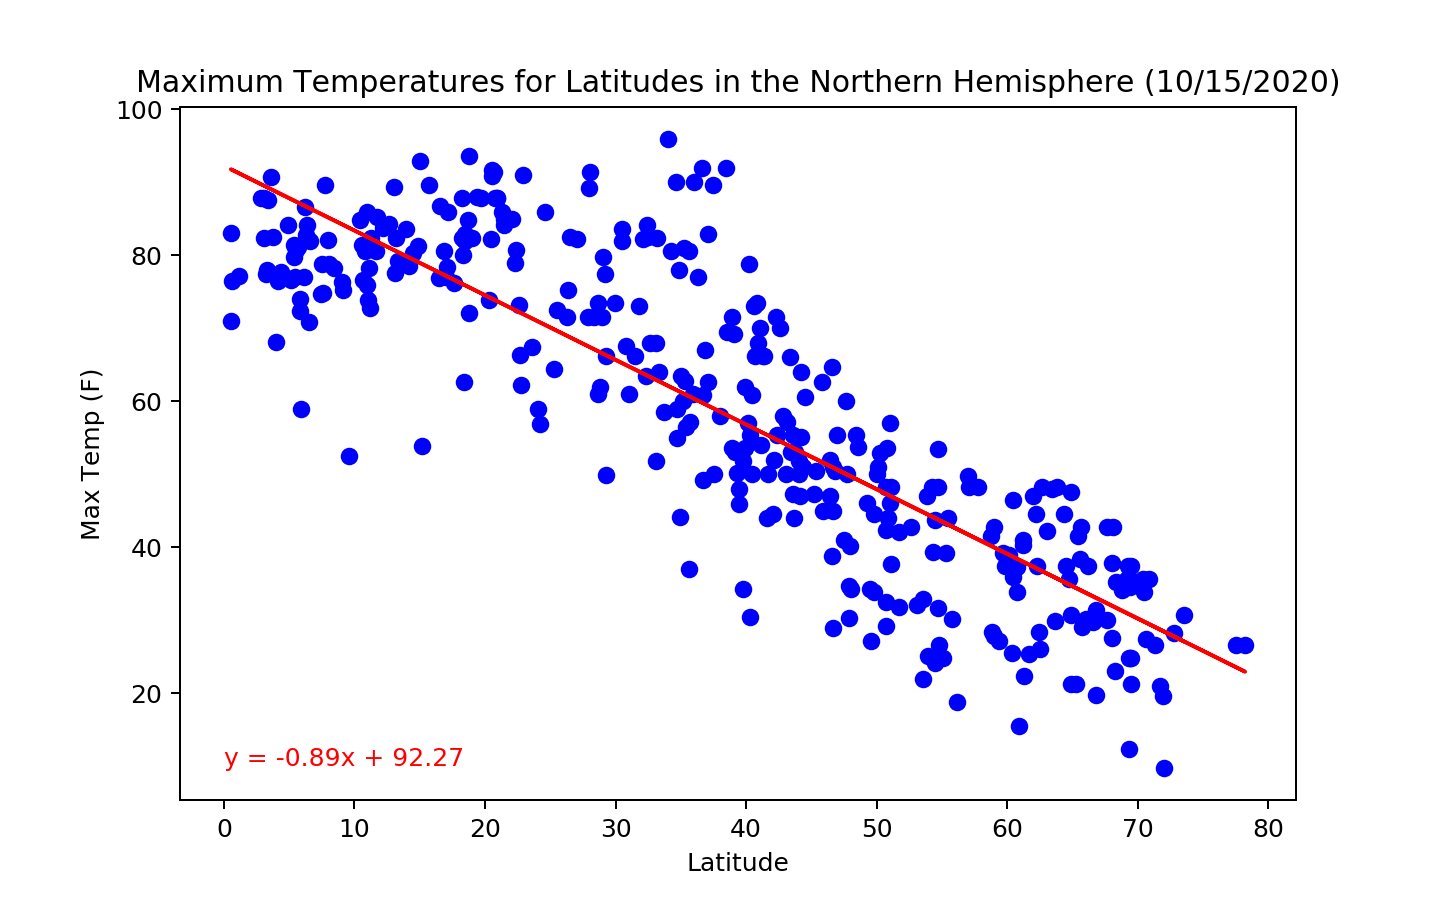

The rvalue is -0.8513909216975649.


In [19]:
ax5= linregressplot(north['Lat'], north['Max Temp (F)'], "Latitude", "Max Temp (F)", (0, 10))
plt.title("Maximum Temperatures for Latitudes in the Northern Hemisphere (10/15/2020)")
plt.savefig("Fig5.png");

##### Northern Hemisphere - Maximum Temperatures (Fig 5)
As a city is farther away from the equator, the cooler the temperatures are.

## Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


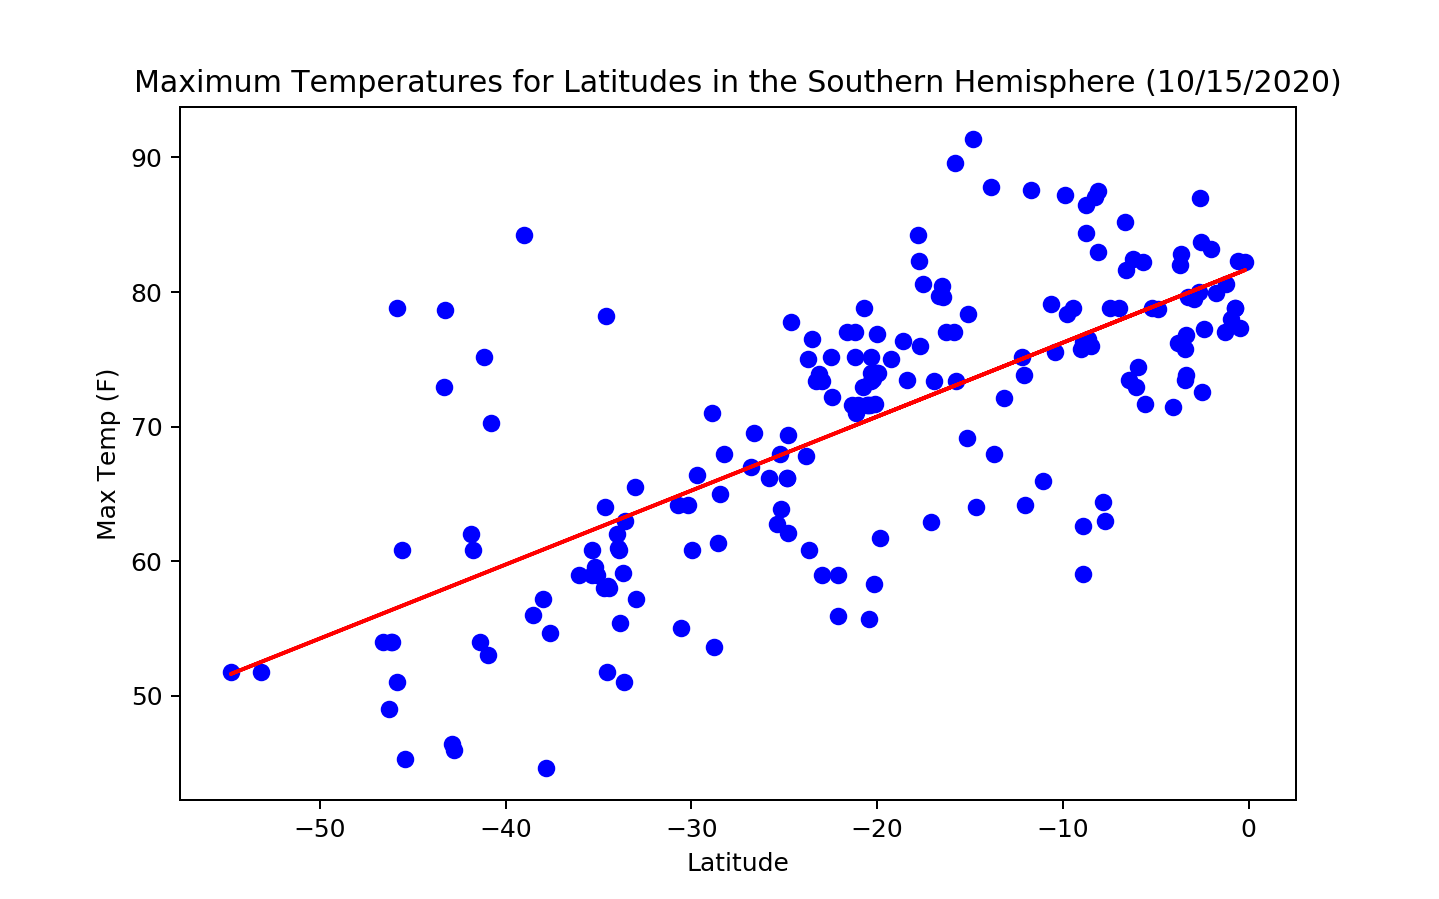

The rvalue is 0.7086398517639244.


In [20]:
ax6= linregressplot(south['Lat'], south['Max Temp (F)'], "Latitude", "Max Temp (F)", (-20, 40))
plt.title("Maximum Temperatures for Latitudes in the Southern Hemisphere (10/15/2020)")
plt.savefig("Fig6.png");

##### Southern Hemisphere - Maximum Temperatures (Fig 6)
Alternately, the closer a city is to the equator, the hotter the temperature.

##  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


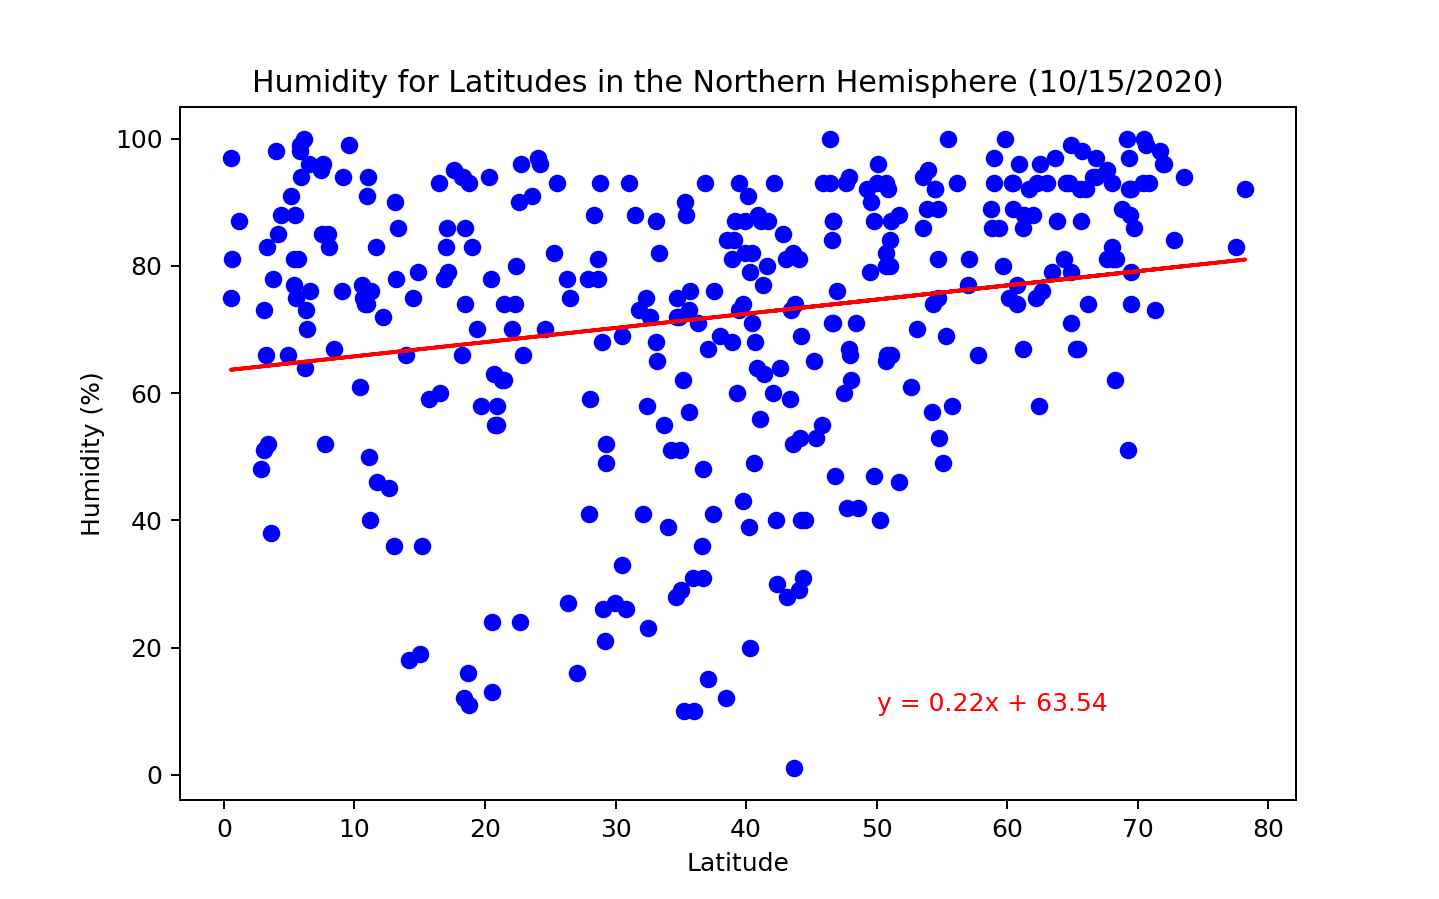

The rvalue is 0.20654470314723905.


In [21]:
ax7= linregressplot(north['Lat'], north['Humidity (%)'], "Latitude", "Humidity (%)", (50, 10))
plt.title("Humidity for Latitudes in the Northern Hemisphere (10/15/2020)")
plt.savefig("Fig7.png");

##### Northern Hemisphere - Humidity (Fig 7)
The humidity in the Northern Hemisphere appears to have a weak correlation, confirmed by small the r-value.  

##  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


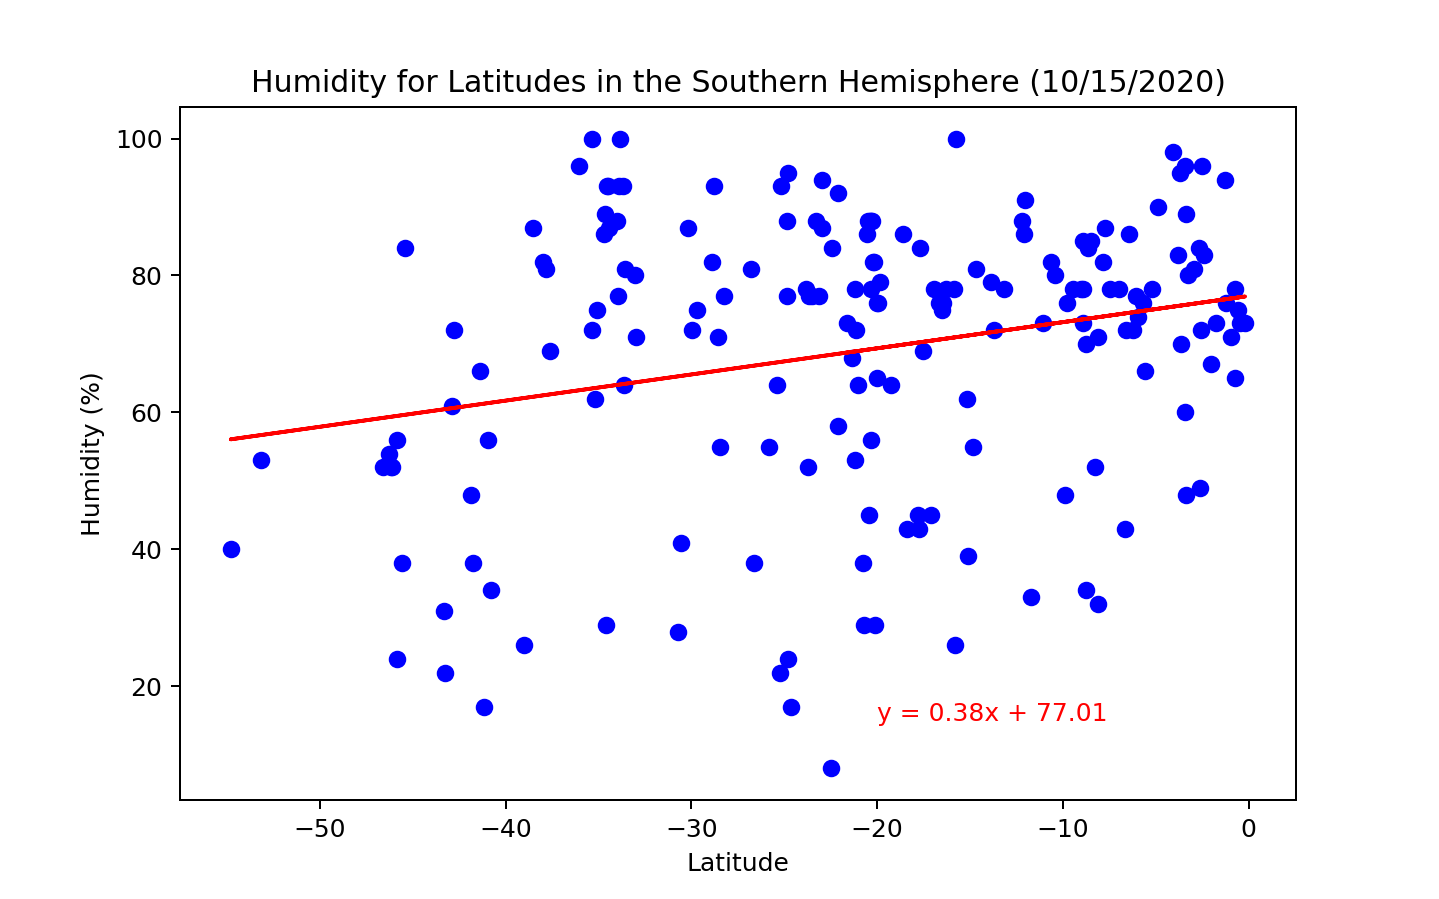

The rvalue is 0.24932639011494806.


In [22]:
ax8= linregressplot(south['Lat'], south['Humidity (%)'], "Latitude", "Humidity (%)", (-20, 15))
plt.title("Humidity for Latitudes in the Southern Hemisphere (10/15/2020)")
plt.savefig("Fig8.png");

##### Southern Hemisphere - Humidity (Fig 8)
Similar to looking at the humidity percentages in the Northern Hemisphere against a city's latitudinal location, in the Southern Hemisphere, there is also a weak correlation.

##  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


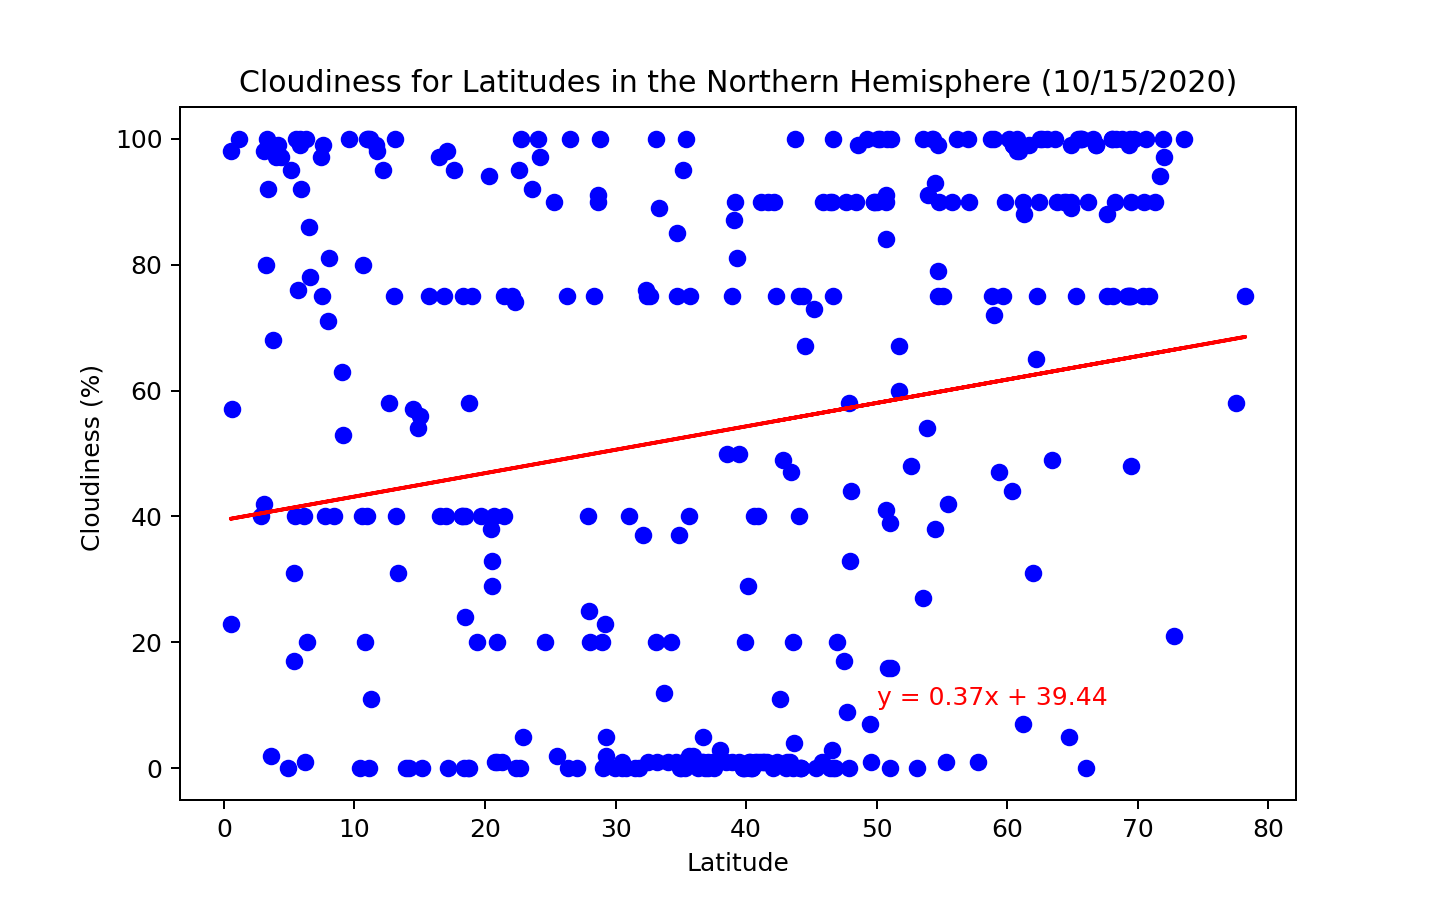

The rvalue is 0.1913801914496691.


In [23]:
ax9= linregressplot(north['Lat'], north['Cloudiness (%)'], "Latitude", "Cloudiness (%) ", (50, 10))
plt.title("Cloudiness for Latitudes in the Northern Hemisphere (10/15/2020)")
plt.savefig("Fig9.png");

##### Northern Hemisphere - Cloudiness (Fig 9)
The relationship between cloud coverage in a city and its latitude does not have a correlation.

##  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


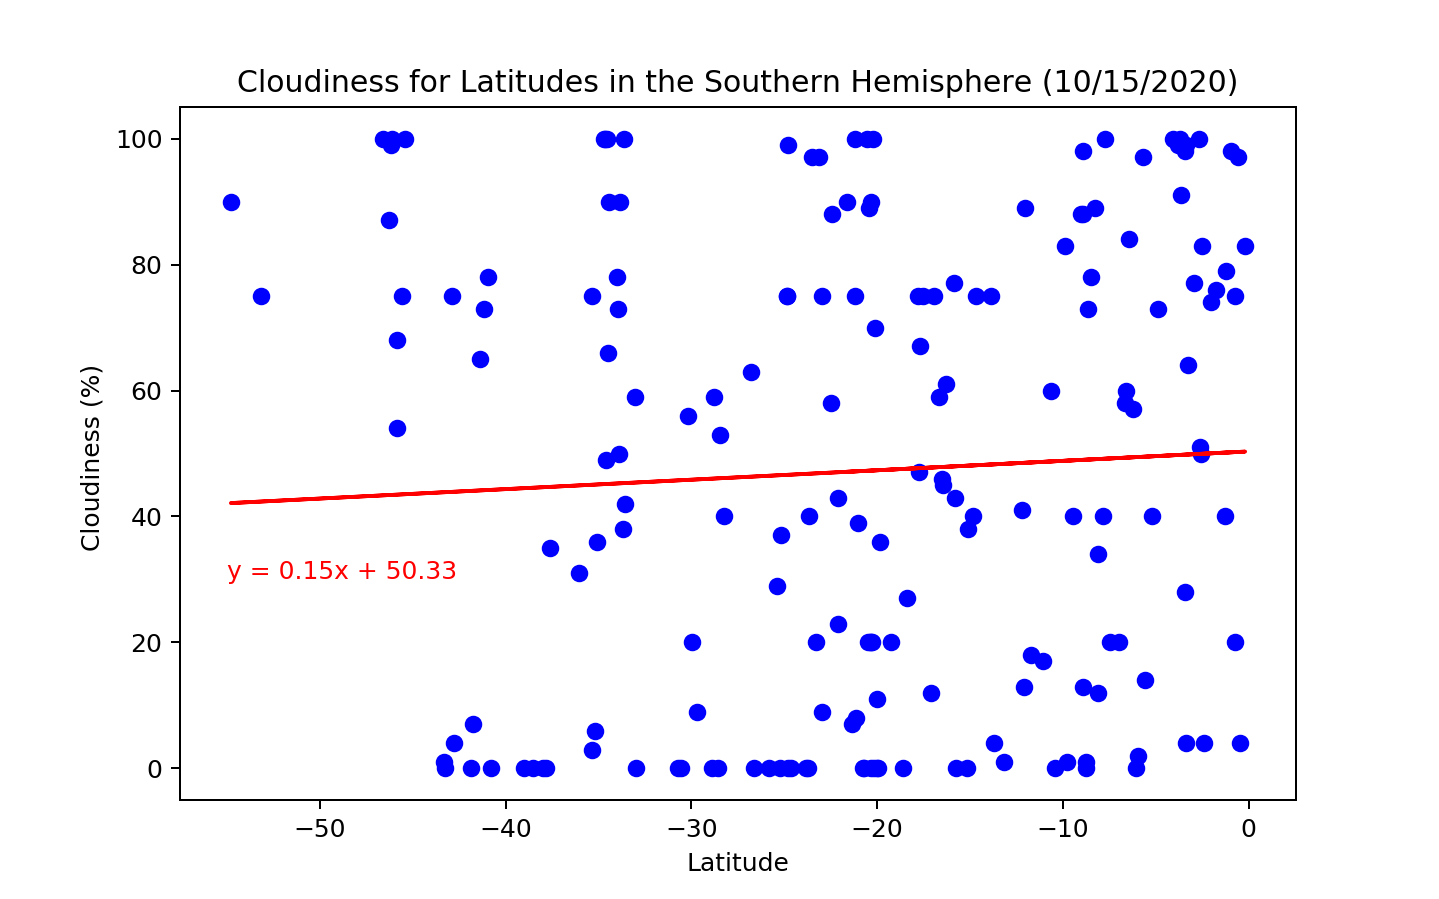

The rvalue is 0.05521770793504376.


In [24]:
ax10= linregressplot(south['Lat'], south['Cloudiness (%)'], "Latitude", "Cloudiness (%) ", (-55, 30))
plt.title("Cloudiness for Latitudes in the Southern Hemisphere (10/15/2020)")
plt.savefig("Fig10.png");

##### Southern Hemisphere - Cloudiness (Fig 10)
Like in the Northern Hemisphere, a very weak relationship between the cloud level and proximity to the equator.

##  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


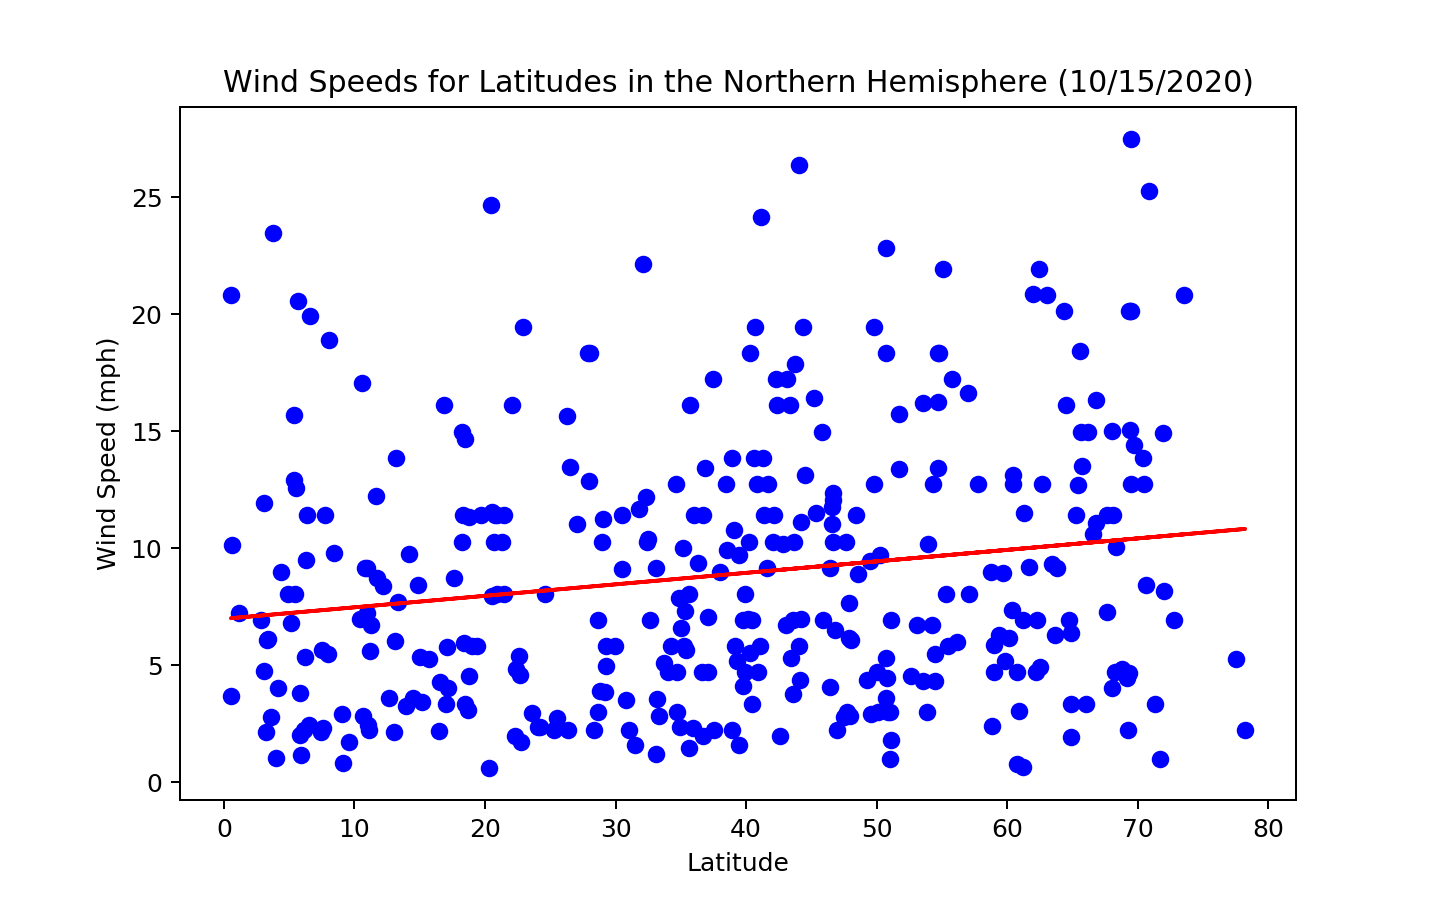

The rvalue is 0.17579397905723976.


In [25]:
ax11= linregressplot(north['Lat'], north['Wind Speed (mph)'], "Latitude", "Wind Speed (mph)", (0, 30))
plt.title("Wind Speeds for Latitudes in the Northern Hemisphere (10/15/2020)")
plt.savefig("Fig11.png");

##### Northern Hemisphere - Wind Speed (Fig 11)
The wind speeds vary across most of the latitudinal coordinates, but there is a modest increase in wind speeds as we near the North Pole.

##  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


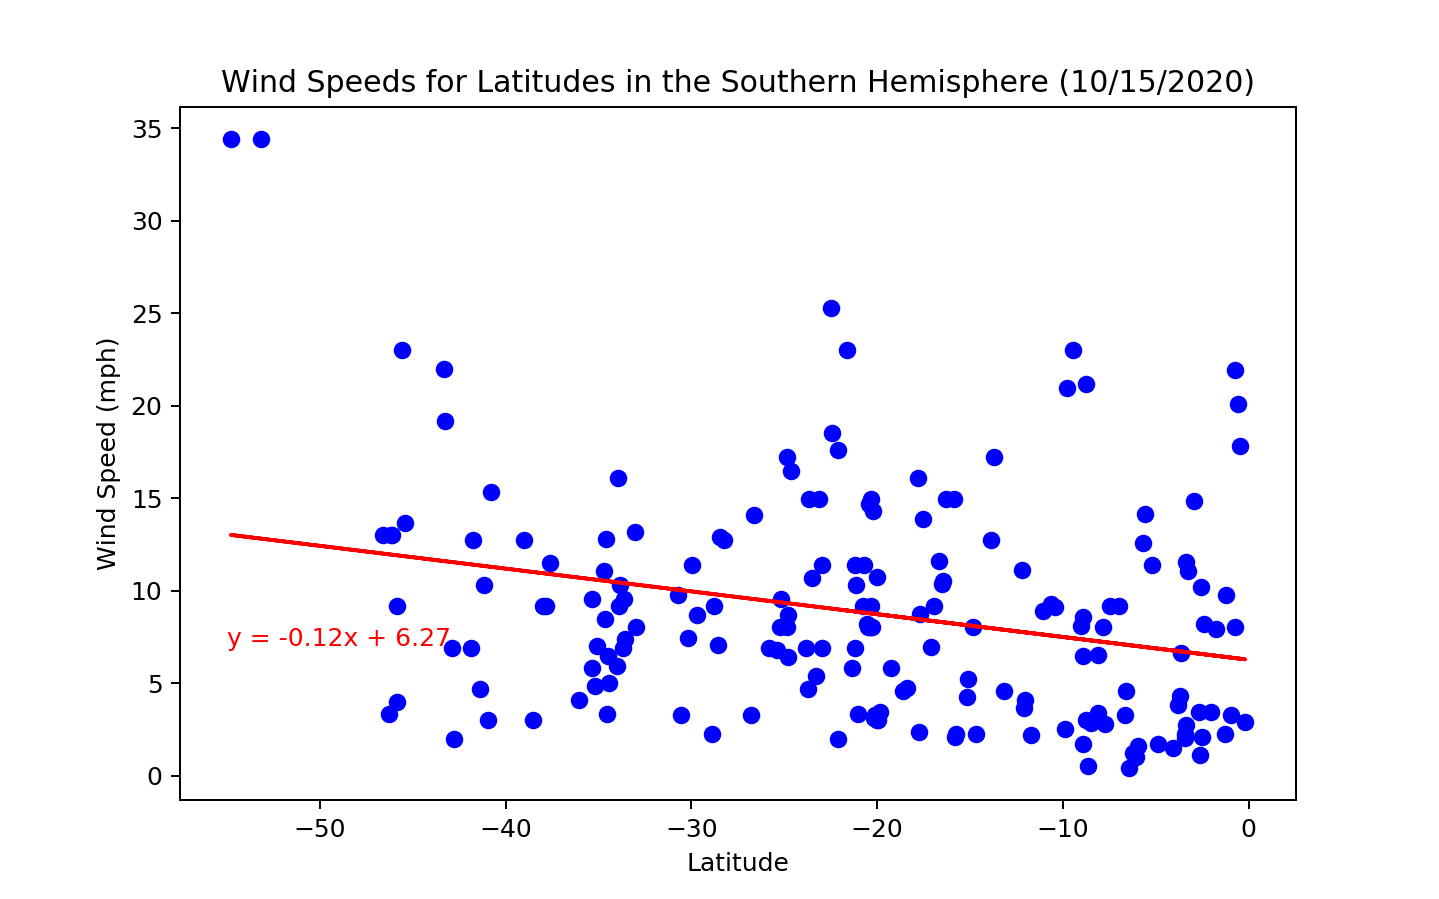

The rvalue is -0.27396991947921334.


In [26]:
ax12= linregressplot(south['Lat'], south['Wind Speed (mph)'], "Latitude", "Wind Speed (mph)", (-55, 7))
plt.title("Wind Speeds for Latitudes in the Southern Hemisphere (10/15/2020)")
plt.savefig("Fig12.png");

##### Southern Hemisphere - Wind Speed (Fig 12)
A small regression indicates decreasing wind speeds as a city is closer to the equator, but more analysis is required to assess if there is in fact a relationship.